In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [12]:
df = pd.read_csv('.\income.csv')
df.drop('Name', axis=1, inplace=True)
df.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


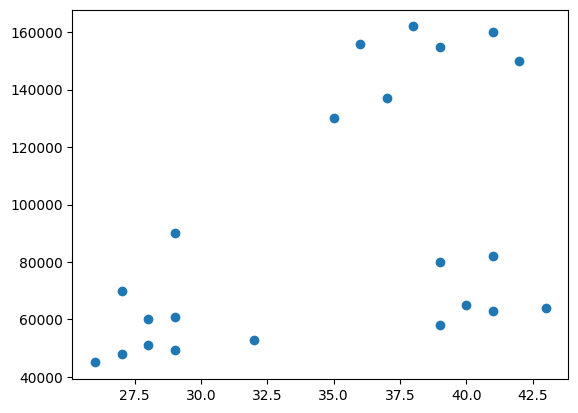

In [13]:
plt.scatter(df['Age'], df['Income($)'])

In [14]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3))
])

pipe.fit(df[['Age', 'Income($)']])
df['cluster'] = pipe.predict(df[['Age', 'Income($)']])
df.head()

c:\Users\shekh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Age,Income($),cluster
0,27,70000,0
1,29,90000,0
2,29,61000,0
3,28,60000,0
4,42,150000,1


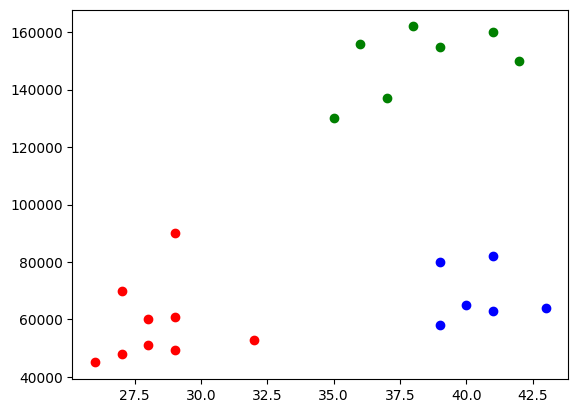

In [15]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

plt.scatter(df0['Age'], df0['Income($)'], color='red')
plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='blue')

In [41]:
k_val = range(1, 10)
inertia = [] # sum of squared distances of samples to their closest cluster center

for k in k_val:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

c:\Users\shekh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shekh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shekh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shekh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

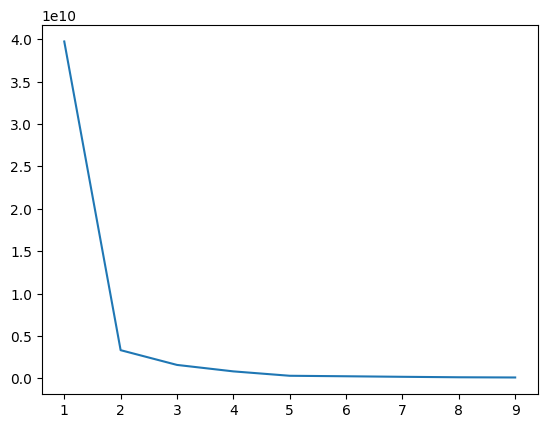

In [42]:
plt.plot(k_val, inertia)